<a href="https://colab.research.google.com/github/AnisimovaPV/Machine-learning/blob/main/L_1_vers_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

# **Информация о данных**

Датасет содержит информацию о черной пятнице. Розничная компания «ABC Private Limited» хочет понять покупательское поведение клиентов (в частности, сумму покупки) в отношении различных продуктов разных категорий. Они поделились сводкой о покупках различных клиентов для выбранных крупносерийных продуктов за последний месяц.
Набор данных также содержит демографические данные клиентов (возраст, пол, семейное положение, тип города, пребывание в текущем городе), сведения о продукте (идентификатор продукта и категория продукта) и общую сумму покупки за последний месяц. По признакам необходимо узнать, кто совершил покупку(мужчина или женщина)

# **Загрузка данных**

In [ ]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/AnisimovaPV/Z/main/train.csv")
data_raw.shape     

(550068, 12)

In [ ]:
data_raw.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
data_raw.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Каждая строка соответсвует одному покупателю. Столбцы (признаки):

* User_ID Идентификатор пользователя
* Product_ID Идентификатор продукта
* Gender пользователя
* Age Возраст
* Occupation Род занятий 
* City_Category Категория города (A,B,C)
* Stay_In_Current_City_Years Количество лет пребывания в текущем городе
* Marital_Status Семейное положение
* Product_Category_1 Категория продукта 
* Product_Category_2 Продукт может принадлежать и к другой категории 
* Product_Category_3 Продукт может принадлежать и к другой категории 
* Purchase Сумма покупки

Имена ячеек:


In [ ]:
data_raw.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
data_raw.index

RangeIndex(start=0, stop=550068, step=1)

**Обработка пропущенных значений**

In [ ]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


Исследуем категориальные и количественные данные на наличие пустых значений и обработаем их

In [ ]:
data_raw[categorical_columns].count(axis = 0)

Product_ID                    550068
Gender                        550068
Age                           550068
City_Category                 550068
Stay_In_Current_City_Years    550068
dtype: int64

In [ ]:
data_raw[numerical_columns].count(axis = 0)

User_ID               550068
Occupation            550068
Marital_Status        550068
Product_Category_1    550068
Product_Category_2    376430
Product_Category_3    166821
Purchase              550068
dtype: int64

In [ ]:
Тут пропуски медианным значением

In [ ]:
data_raw['Product_Category_2'] = data_raw['Product_Category_2'].fillna(data_raw['Product_Category_2'].median(axis = 0), axis = 0)
data_raw['Product_Category_3'] = data_raw['Product_Category_3'].fillna(data_raw['Product_Category_3'].median(axis = 0), axis = 0)

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


**Обработка категориальных значений**

Столбцы ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'] содержат категориальные признаки. Необходимо заменить их тип 'Object' на специальный, предназначенный для хранения категориальных значений

In [ ]:
data_raw['Gender'] = data_raw['Gender'].astype('category')
data_raw['Age'] = data_raw['Age'].astype('category')
data_raw['City_Category'] = data_raw['City_Category'].astype('category')
data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].astype('category')

In [ ]:
data_raw['Gender'].dtype

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [ ]:
data_raw['Age'].dtype

CategoricalDtype(categories=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], ordered=False)

In [ ]:
data_raw['City_Category'].dtype


CategoricalDtype(categories=['A', 'B', 'C'], ordered=False)

In [ ]:
data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].replace("Free", np.nan , regex=True)
data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].apply(lambda v: float(str(v).replace("+","")))
data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].astype('float')
data_raw['Stay_In_Current_City_Years'].dtype

dtype('float64')

In [ ]:
data_raw['Stay_In_Current_City_Years'].dtype

dtype('float64')

**Обработка выбросов**

Построим графики зависимостей, чтобы оценить количество выбросов

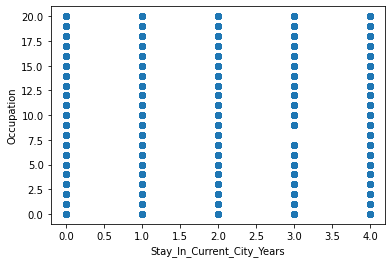

In [ ]:
plt.scatter(data_raw['Stay_In_Current_City_Years'], data_raw['Occupation'], alpha=1)
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Occupation')
pass

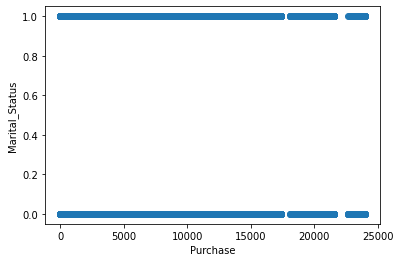

In [ ]:
plt.scatter(data_raw['Purchase'], data_raw['Marital_Status'], alpha=1)
plt.xlabel('Purchase')
plt.ylabel('Marital_Status')
pass

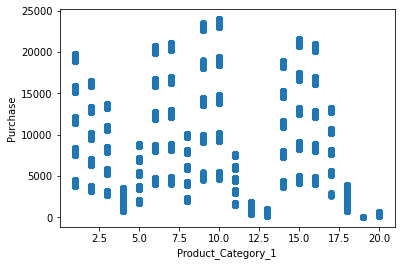

In [ ]:
plt.scatter(data_raw['Product_Category_1'], data_raw['Purchase'], alpha=1)
plt.xlabel('Product_Category_1')
plt.ylabel('Purchase')
pass

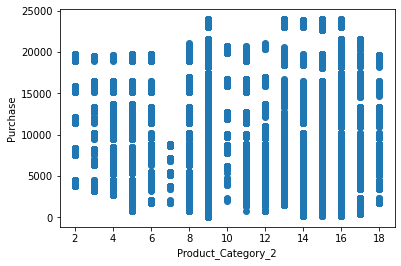

In [ ]:
plt.scatter(data_raw['Product_Category_2'], data_raw['Purchase'], alpha=1)
plt.xlabel('Product_Category_2')
plt.ylabel('Purchase')
pass

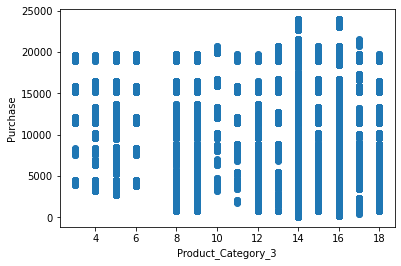

In [ ]:
plt.scatter(data_raw['Product_Category_3'], data_raw['Purchase'], alpha=1)
plt.xlabel('Product_Category_3')
plt.ylabel('Purchase')
pass

Нужно найти квантили для этих признаков

In [ ]:
data_raw['Purchase'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     3540.0
0.500     8047.0
0.700    11528.0
0.900    16317.0
0.950    19336.0
0.999    23729.0
1.000    23961.0
Name: Purchase, dtype: float64

In [ ]:
data_raw['Product_Category_1'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     1.0
0.500     5.0
0.700     8.0
0.900    11.0
0.950    13.0
0.999    20.0
1.000    20.0
Name: Product_Category_1, dtype: float64

In [ ]:
data_raw['Product_Category_2'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     4.0
0.500     9.0
0.700    12.0
0.900    16.0
0.950    16.0
0.999    18.0
1.000    18.0
Name: Product_Category_2, dtype: float64

In [ ]:
data_raw['Product_Category_3'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100    12.0
0.500    14.0
0.700    14.0
0.900    15.0
0.950    16.0
0.999    18.0
1.000    18.0
Name: Product_Category_3, dtype: float64

Избавимся от строк с большими значение которых превышает 0,995 квантиля.



In [ ]:
rows_to_drop = data_raw[
    (data_raw['Product_Category_1'] > data_raw['Product_Category_1'].quantile(0.995)) | 
    (data_raw['Product_Category_2'] > data_raw['Product_Category_2'].quantile(0.995)) | 
    (data_raw['Product_Category_3']  > data_raw['Product_Category_3' ].quantile(0.995))| 
    (data_raw['Purchase']  > data_raw['Purchase' ].quantile(0.995))].index
    
data1 = data_raw.drop(rows_to_drop)
data1.shape

(544768, 12)

**Визуализация и описательная статистика**

In [ ]:
data1.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.447680e+05,544768.000000,544768.000000,544768.000000,544768.000000,544768.000000,544768.000000,544768.000000
mean,1.003028e+06,8.074090,1.858569,0.409433,5.309216,9.558676,13.589818,9235.304572
std,1.727278e+03,6.522524,1.289540,0.491730,3.805348,4.233170,2.362523,4911.594911
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,8.000000,14.000000,5840.000000
50%,1.003075e+06,7.000000,2.000000,0.000000,5.000000,9.000000,14.000000,8046.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,14.000000,14.000000,12029.000000
max,1.006040e+06,20.000000,4.000000,1.000000,19.000000,18.000000,18.000000,21352.000000


In [ ]:
data1.describe(include=['category'])

,Gender,Age,City_Category
count,544768,544768,544768
unique,2,7,3
top,M,26-35,B
freq,410285,217734,229334


**Вычислим матрицу корреляции**

In [ ]:
corr_matrix = data1.corr()
corr_matrix

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.024150,-0.030770,0.020452,0.003668,0.001329,0.000965,0.004251
Occupation,-0.024150,1.000000,0.030274,0.024150,-0.008762,0.000294,0.004195,0.020662
Stay_In_Current_City_Years,-0.030770,0.030274,1.000000,-0.012750,-0.004103,-0.001064,0.000726,0.005657
Marital_Status,0.020452,0.024150,-0.012750,1.000000,0.019916,0.011308,0.012604,-0.001321
Product_Category_1,0.003668,-0.008762,-0.004103,0.019916,1.000000,0.341736,0.198235,-0.354346
Product_Category_2,0.001329,0.000294,-0.001064,0.011308,0.341736,1.000000,0.416608,-0.176471
Product_Category_3,0.000965,0.004195,0.000726,0.012604,0.198235,0.416608,1.000000,-0.100227
Purchase,0.004251,0.020662,0.005657,-0.001321,-0.354346,-0.176471,-0.100227,1.000000


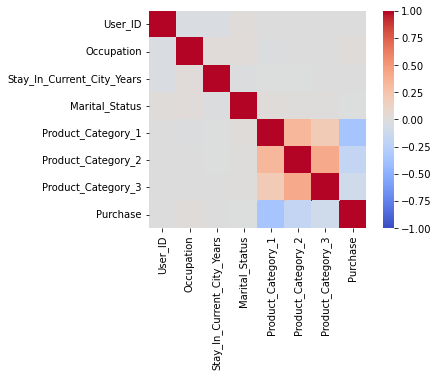

In [ ]:
corr_mat = data1.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
pass
     

In [ ]:
data1['Gender'].value_counts()

M    410285
F    134483
Name: Gender, dtype: int64

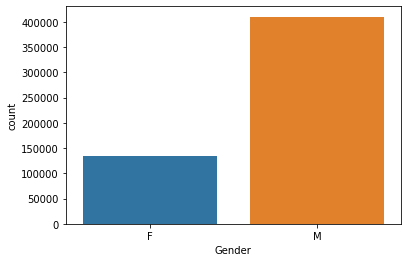

In [ ]:
sns.countplot(data=data1,x='Gender')
pass

**Обработка категориальных значений**

Мы имеем категориальный признаков: 'Gender','City_Category', 'Age'.

In [ ]:
data_raw['City_Category'].unique()
city_dummies = pd.get_dummies(data_raw['City_Category'])
city_dummies.head()

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [ ]:
data_raw['Age'].unique()
age_dummies = pd.get_dummies(data_raw['Age'])
age_dummies.head()

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1


In [ ]:
data_raw['Gender'] = data_raw['Gender'].astype('object')

data_raw.loc[(data_raw['Gender'] == 'F'), 'Gender'] = 0
data_raw.loc[(data_raw['Gender'] == 'M'), 'Gender'] = 1

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  float64 
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category_1          550068 non-null  int64   
 9   Product_Category_2          550068 non-null  float64 
 10  Product_Category_3          550068 non-null  float64 
 11  Purchase                    550068 non-null  int64   
dtypes: category(2), float64(3), int64(5), object(2)
memory usa

In [ ]:
data_raw = pd.concat((data_raw, city_dummies), axis = 1)
data_raw = pd.concat((data_raw, age_dummies), axis = 1)

data_raw = data_raw.drop(['City_Category'], axis = 1)
data_raw.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,A,B,C,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1000001,P00069042,0,0-17,10,2.0,0,3,9.0,14.0,...,1,0,0,1,0,0,0,0,0,0
1,1000001,P00248942,0,0-17,10,2.0,0,1,6.0,14.0,...,1,0,0,1,0,0,0,0,0,0
2,1000001,P00087842,0,0-17,10,2.0,0,12,9.0,14.0,...,1,0,0,1,0,0,0,0,0,0
3,1000001,P00085442,0,0-17,10,2.0,0,12,14.0,14.0,...,1,0,0,1,0,0,0,0,0,0
4,1000002,P00285442,1,55+,16,4.0,0,8,9.0,14.0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
data_raw = data_raw.drop(['Age'], axis = 1)
data_raw.head()

,User_ID,Product_ID,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1000001,P00069042,0,10,2.0,0,3,9.0,14.0,8370,1,0,0,1,0,0,0,0,0,0
1,1000001,P00248942,0,10,2.0,0,1,6.0,14.0,15200,1,0,0,1,0,0,0,0,0,0
2,1000001,P00087842,0,10,2.0,0,12,9.0,14.0,1422,1,0,0,1,0,0,0,0,0,0
3,1000001,P00085442,0,10,2.0,0,12,14.0,14.0,1057,1,0,0,1,0,0,0,0,0,0
4,1000002,P00285442,1,16,4.0,0,8,9.0,14.0,7969,0,0,1,0,0,0,0,0,0,1


In [ ]:
data_raw=data_raw.drop(['Product_ID'], axis = 1)

In [ ]:
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  float64
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   A                           550068 non-null  uint8  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
 12  0-17                        550068 non-null  uint8  
 13  18-25         

# **Обучение**

**Выбор обучающей и тестовой выборок**

In [ ]:
X = data_raw.drop('Gender', axis = 1)
y = data_raw['Gender']
feature_names = X.columns

In [ ]:
feature_names

Index(['User_ID', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'A', 'B', 'C', '0-17', '18-25', '26-35', '36-45', '46-50',
       '51-55', '55+'],
      dtype='object')

In [ ]:
X = X.to_numpy()
type(X)

numpy.ndarray

In [ ]:
y = np.array(y, dtype='int')
y

array([0, 0, 0, ..., 0, 0, 0])

**Проверка на совпадение размерности массивов для работы с ними**

разобьем данные на обучающую и тестовую выборки. За обучающую возьмем 0.75 данных, за тестовую 0,25

In [ ]:
print(X.shape)
print(y.shape)
N, d = X.shape

(550068, 18)
(550068,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

print(N_train, N_test)

412551 137517


**kNN - метод ближайших соседей**

10 соседей

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)

In [ ]:
err_test

0.2522088178188878

7 соседей

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test
     

0.24379531257953563

13 соседей

In [ ]:

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.24260273275304145

**Random Forest**

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.019350334867689084


In [ ]:
np.sum(rf.feature_importances_)


0.9999999999999999

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]])) 

Feature ranking:
 1. feature 'User_ID' (0.402449)
 2. feature 'Occupation' (0.176364)
 3. feature 'Stay_In_Current_City_Years' (0.097311)
 4. feature 'Purchase' (0.095189)
 5. feature 'Marital_Status' (0.030329)
 6. feature 'Product_Category_2' (0.027472)
 7. feature 'Product_Category_1' (0.025865)
 8. feature '    B' (0.019428)
 9. feature '    C' (0.018494)
10. feature '    A' (0.018343)
11. feature 'Product_Category_3' (0.016319)
12. feature '36-45' (0.015565)
13. feature '26-35' (0.015504)
14. feature '18-25' (0.012879)
15. feature '46-50' (0.009027)
16. feature '51-55' (0.008874)
17. feature '  55+' (0.006570)
18. feature ' 0-17' (0.004017)


(-5.0, 15.0)

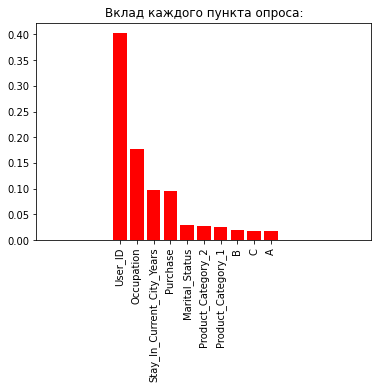

In [ ]:
d_first = 10
plt.title("Вклад каждого пункта опроса:")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'red')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-5, d_first+5])

User_ID, Occupation, Stay_In_Curent_City_Years, Purchase вносят значительный вклад

### **Вывод:**

В данной работе был произведен анализ данных и решение задачи классификации с помощью моделей, натренированых методами К-ближайших соседей и дерева решений.

Алгоритм Дерева Решений оказался точнее алгоритма к-ближайших соседей при оптимальных параметрах каждого из методов, как на обучающей выборке, так и на тестовой.